# Hypothesis 4

### Chi-squared test for homogeneity

H0: This is no difference in visa certification rates between candidates offered salaried (yearly paid) positions and those offered hourly positions.

HA: There is a difference in visa certification rates between candidates offered salaried (yearly paid) positions and those offered hourly positions.

Target variable = Certification (categorical)
Independent variable = Wage type (categorical)
- Levels = Hourly, yearly

Alpha = .01

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv('visa_clean.csv')

In [52]:
df.head()

,Unnamed: 0,application_type,case_received_date,case_status,class_of_admission,decision_date,employer_city,employer_name,employer_num_employees,employer_state,...,foreign_worker_birth_country,foreign_worker_edu_other,foreign_worker_rel_occ_exp,foreign_worker_req_exp,naics_num,naics_title,wage_offer_from,wage_offer_to,wage_unit_of_pay_offer,pw_job_title
0,0,PERM,NaN,Certified,J-1,2012-02-01,NEW YORK,NETSOFT USA INC.,NaN,NY,...,NaN,NaN,NaN,NaN,541512,COMPUTER SYSTEMS DESIGN SERVICES,75629,NaN,Year,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS"
1,1,PERM,NaN,Denied,B-2,2011-12-21,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NaN,NY,...,NaN,NaN,NaN,NaN,562211,HAZARDOUS WASTE TREATMENT AND DISPOSAL,37024,NaN,Year,ASBESTOS HANDLER
2,2,PERM,NaN,Certified,H-1B,2011-12-01,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",NaN,VA,...,NaN,NaN,NaN,NaN,541330,ENGINEERING SERVICES,47923,NaN,Year,CIVIL ENGINEER
3,3,PERM,NaN,Certified,B-2,2011-12-01,FLUSHING,EBENEZER MISSION CHURCH,NaN,NY,...,NaN,NaN,NaN,NaN,813110,RELIGIOUS ORGANIZATIONS,10.97,NaN,Hour,FILE CLERK
4,4,PERM,NaN,Certified,L-1,2012-01-26,ALBANY,ALBANY INTERNATIONAL CORP.,NaN,NY,...,NaN,NaN,NaN,NaN,333291,PAPER INDUSTRY MACHINERY MANUFACTURING,100000,NaN,Year,SALES & SERVICE ENGINEER


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 32 columns):
Unnamed: 0                       374362 non-null int64
application_type                 135269 non-null object
case_received_date               239091 non-null object
case_status                      374362 non-null object
class_of_admission               351517 non-null object
decision_date                    374362 non-null object
employer_city                    374348 non-null object
employer_name                    374350 non-null object
employer_num_employees           239013 non-null float64
employer_state                   374320 non-null object
foreign_worker_info_city         239065 non-null object
foreign_worker_info_education    239053 non-null object
foreign_worker_info_state        221898 non-null object
pw_amount_9089                   372146 non-null object
pw_level_9089                    346735 non-null object
pw_soc_code                      373965 non-null 

In [208]:
df['wage_unit_of_pay_offer'].dropna(axis=0, inplace=True)

In [209]:
df['wage_unit_of_pay_offer'].isnull().value_counts()

False    329145
Name: wage_unit_of_pay_offer, dtype: int64

In [210]:
df['wage_unit_of_pay_offer'].value_counts()

Year         319274
Hour           9470
Week            230
Month           141
Bi-Weekly        30
Name: wage_unit_of_pay_offer, dtype: int64

In [211]:
df.columns

Index(['Unnamed: 0', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'decision_date', 'employer_city', 'employer_name',
       'employer_num_employees', 'employer_state', 'foreign_worker_info_city',
       'foreign_worker_info_education', 'foreign_worker_info_state',
       'pw_amount_9089', 'pw_level_9089', 'pw_soc_code', 'pw_soc_title',
       'refile', 'us_economic_sector', 'citizenship', 'case_num',
       'foreign_work_alt_edu', 'foreign_worker_birth_country',
       'foreign_worker_edu_other', 'foreign_worker_rel_occ_exp',
       'foreign_worker_req_exp', 'naics_num', 'naics_title', 'wage_offer_from',
       'wage_offer_to', 'wage_unit_of_pay_offer', 'pw_job_title'],
      dtype='object')

In [212]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [195]:
df['wage_unit_of_pay_offer'].value_counts()

Year         319274
Hour           9470
Week            230
Month           141
Bi-Weekly        30
Name: wage_unit_of_pay_offer, dtype: int64

In [58]:
# Creating dataframe for hourly employees. 
df_hour = df.loc[df['wage_unit_of_pay_offer'] == 'Hour']
df_hour.head()

,application_type,case_received_date,case_status,class_of_admission,decision_date,employer_city,employer_name,employer_num_employees,employer_state,foreign_worker_info_city,...,foreign_worker_birth_country,foreign_worker_edu_other,foreign_worker_rel_occ_exp,foreign_worker_req_exp,naics_num,naics_title,wage_offer_from,wage_offer_to,wage_unit_of_pay_offer,pw_job_title
3,PERM,NaN,Certified,B-2,2011-12-01,FLUSHING,EBENEZER MISSION CHURCH,NaN,NY,NaN,...,NaN,NaN,NaN,NaN,813110,RELIGIOUS ORGANIZATIONS,10.97,NaN,Hour,FILE CLERK
9,PERM,NaN,Denied,E-2,2012-03-30,BROOKLYN,"AMER BROTHERS INTERNATIONAL, INC.",NaN,NY,NaN,...,NaN,NaN,NaN,NaN,452990,ALL OTHER GENERAL MERCHANDISE STORES,12.86,16.82,Hour,SUPERVISOR/MANAGER
12,PERM,NaN,Certified,H-1B,2012-01-26,SADDLE BROOK,"FASTPULSE TECHNOLOGY, INC.",NaN,NJ,NaN,...,NaN,NaN,NaN,NaN,541512,COMPUTER SYSTEMS DESIGN SERVICES,34.3,NaN,Hour,ELECTRONIC ENGINEER
15,PERM,NaN,Certified-Expired,EWI,2011-10-13,WEST HEMPSTEAD,NIKO DEVELOPMENT CORP,NaN,NY,NaN,...,NaN,NaN,NaN,NaN,238320,PAINTING AND WALL COVERING CONTRACTORS,15.64,NaN,Hour,"PAINTERS, CONSTRUCTION AND MAINTENANCE"
16,PERM,NaN,Certified,H-1B,2011-12-05,PLAINSBORO,"COMPUNNEL SOFTWARE GROUP, INC.",NaN,NJ,NaN,...,NaN,NaN,NaN,NaN,541511,CUSTOM COMPUTER PROGRAMMING SERVICES,28.05,NaN,Hour,SYSTEMS ANALYST


In [59]:
# Creating yearly dataframe.
df_year = df.loc[df['wage_unit_of_pay_offer'] == 'Year']
df_year.head()

,application_type,case_received_date,case_status,class_of_admission,decision_date,employer_city,employer_name,employer_num_employees,employer_state,foreign_worker_info_city,...,foreign_worker_birth_country,foreign_worker_edu_other,foreign_worker_rel_occ_exp,foreign_worker_req_exp,naics_num,naics_title,wage_offer_from,wage_offer_to,wage_unit_of_pay_offer,pw_job_title
0,PERM,NaN,Certified,J-1,2012-02-01,NEW YORK,NETSOFT USA INC.,NaN,NY,NaN,...,NaN,NaN,NaN,NaN,541512,COMPUTER SYSTEMS DESIGN SERVICES,75629,NaN,Year,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS"
1,PERM,NaN,Denied,B-2,2011-12-21,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NaN,NY,NaN,...,NaN,NaN,NaN,NaN,562211,HAZARDOUS WASTE TREATMENT AND DISPOSAL,37024,NaN,Year,ASBESTOS HANDLER
2,PERM,NaN,Certified,H-1B,2011-12-01,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",NaN,VA,NaN,...,NaN,NaN,NaN,NaN,541330,ENGINEERING SERVICES,47923,NaN,Year,CIVIL ENGINEER
4,PERM,NaN,Certified,L-1,2012-01-26,ALBANY,ALBANY INTERNATIONAL CORP.,NaN,NY,NaN,...,NaN,NaN,NaN,NaN,333291,PAPER INDUSTRY MACHINERY MANUFACTURING,100000,NaN,Year,SALES & SERVICE ENGINEER
5,PERM,NaN,Denied,EWI,2012-01-26,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NaN,NY,NaN,...,NaN,NaN,NaN,NaN,562910,REMEDIATION SERVICES,37024,NaN,Year,HAZARDOUS MATERIALS REMOVAL WORKER


In [60]:
df_year['case_status'].value_counts()

Certified            163484
Certified-Expired    124496
Denied                17142
Withdrawn             14152
Name: case_status, dtype: int64

In [61]:
# Creating the yearly certified dataset.
yr_cert = df_year.loc[df_year['case_status'] == 'Certified'].count() + df_year.loc[df_year['case_status'] == 'Certified-Expired'].count()
yr_cert

application_type                  77366
case_received_date               210614
case_status                      287980
class_of_admission               273884
decision_date                    287980
employer_city                    287980
employer_name                    287980
employer_num_employees           210612
employer_state                   287976
foreign_worker_info_city         210605
foreign_worker_info_education    210614
foreign_worker_info_state        200824
pw_amount_9089                   287954
pw_level_9089                    268079
pw_soc_code                      287967
pw_soc_title                     287945
refile                            98455
us_economic_sector                74931
citizenship                      287980
case_num                         287980
foreign_work_alt_edu             210614
foreign_worker_birth_country     210612
foreign_worker_edu_other         136981
foreign_worker_rel_occ_exp       210614
foreign_worker_req_exp           210614


In [63]:
# Creating the yearly denied dataframe. 
yr_den = df_year.loc[df_year['case_status'] == 'Denied'].count() + df_year.loc[df_year['case_status'] == 'Withdrawn'].count()
yr_den

application_type                 11317
case_received_date               19975
case_status                      31294
class_of_admission               27427
decision_date                    31294
employer_city                    31292
employer_name                    31292
employer_num_employees           19956
employer_state                   31280
foreign_worker_info_city         19970
foreign_worker_info_education    19969
foreign_worker_info_state        17315
pw_amount_9089                   31186
pw_level_9089                    29525
pw_soc_code                      31232
pw_soc_title                     31151
refile                           15378
us_economic_sector               10969
citizenship                      31274
case_num                         31294
foreign_work_alt_edu             19975
foreign_worker_birth_country     19965
foreign_worker_edu_other         11093
foreign_worker_rel_occ_exp       19974
foreign_worker_req_exp           19976
naics_num                

In [64]:
# Creating the hourly certified dataset.
hr_cert = df_hour.loc[df_hour['case_status'] == 'Certified'].count() + df_hour.loc[df_hour['case_status'] == 'Certified-Expired'].count()
hr_cert

application_type                 1479
case_received_date               4884
case_status                      6363
class_of_admission               5703
decision_date                    6363
employer_city                    6363
employer_name                    6363
employer_num_employees           4882
employer_state                   6363
foreign_worker_info_city         4881
foreign_worker_info_education    4884
foreign_worker_info_state        2002
pw_amount_9089                   6354
pw_level_9089                    6202
pw_soc_code                      6363
pw_soc_title                     6358
refile                           1649
us_economic_sector               1439
citizenship                      6363
case_num                         6363
foreign_work_alt_edu             4884
foreign_worker_birth_country     4884
foreign_worker_edu_other         3977
foreign_worker_rel_occ_exp       4884
foreign_worker_req_exp           4884
naics_num                        6337
naics_title 

In [65]:
# Creating the hourly denied dataset.
hr_den = df_hour.loc[df_hour['case_status'] == 'Denied'].count() + df_hour.loc[df_hour['case_status'] == 'Withdrawn'].count()
hr_den

application_type                  953
case_received_date               2154
case_status                      3107
class_of_admission               1963
decision_date                    3107
employer_city                    3102
employer_name                    3104
employer_num_employees           2134
employer_state                   3101
foreign_worker_info_city         2151
foreign_worker_info_education    2150
foreign_worker_info_state         861
pw_amount_9089                   2951
pw_level_9089                    2447
pw_soc_code                      2981
pw_soc_title                     2861
refile                           1328
us_economic_sector                830
citizenship                      3097
case_num                         3107
foreign_work_alt_edu             2140
foreign_worker_birth_country     2147
foreign_worker_edu_other         1550
foreign_worker_rel_occ_exp       2150
foreign_worker_req_exp           2150
naics_num                        2854
naics_title 

In [66]:
# Creating np array for Chi Squared test. 
certified = [yr_cert['case_status'], hr_cert['case_status']]
denied = [yr_den['case_status'],hr_den['case_status']]
wage_chi2 = np.array([certified,denied])
wage_chi2

array([[287980,   6363],
       [ 31294,   3107]])

In [84]:
# Running chi-squared
chi2_stat, p_val, dof, ex = chi2_contingency(wage_chi2)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

#interpret test-statistics
prob = .99
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, chi2_stat))
if abs(chi2_stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

===Chi2 Stat===
5193.630366413307


===Degrees of Freedom===
1


===P-Value===
0.0


===Contingency Table===
[[285863.97616991   8479.02383009]
 [ 33410.02383009    990.97616991]]
probability=0.990, critical=6.635, stat=5193.630
Dependent (reject H0)
significance=0.010, p=0.000
Dependent (reject H0)


### Results:

- Extremely high Chi-Squared statistic. 
- Low p-value.
- We can reject the null hypothesis.
- Worth cross checking whether this is true for all job titles or only some. 

In [92]:
# Creating new datasets specifically for Software Developers, Applications. 
df_hr_sft = df_hour.loc[df_hour['pw_job_title'] == 'SOFTWARE DEVELOPERS, APPLICATIONS']
df_yr_sft = df_year.loc[df_year['pw_job_title'] == 'SOFTWARE DEVELOPERS, APPLICATIONS']

In [93]:
# Software developer certifications.
hr_sft_cert = df_hr_sft.loc[df_hr_sft['case_status'] == 'Certified'].count() + df_hr_sft.loc[df_hr_sft['case_status'] == 'Certified-Expired'].count()
yr_sft_cert = df_yr_sft.loc[df_yr_sft['case_status'] == 'Certified'].count() + df_yr_sft.loc[df_yr_sft['case_status'] == 'Certified-Expired'].count()

In [94]:
# Software developer denials.
hr_sft_den = df_hr_sft.loc[df_hr_sft['case_status'] == 'Denied'].count() + df_hr_sft.loc[df_hr_sft['case_status'] == 'Withdrawn'].count()
yr_sft_den = df_yr_sft.loc[df_yr_sft['case_status'] == 'Denied'].count() + df_yr_sft.loc[df_yr_sft['case_status'] == 'Withdrawn'].count()


In [95]:
# New np array for Chi Squared test. 
s_certified = [yr_sft_cert['case_status'], hr_sft_cert['case_status']]
s_denied = [yr_sft_den['case_status'],hr_sft_den['case_status']]
swage_chi2 = np.array([s_certified,s_denied])
swage_chi2

array([[86281,   635],
       [ 5448,    48]])

In [96]:
# Performing Chi-Squared

s_chi2_stat, s_p_val, s_dof, s_ex = chi2_contingency(swage_chi2)
print("===Chi2 Stat===")
print(s_chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(s_dof)
print("\n")
print("===P-Value===")
print(s_p_val)
print("\n")
print("===Contingency Table===")
print(s_ex)

===Chi2 Stat===
1.2482406765826557


===Degrees of Freedom===
1


===P-Value===
0.26388876471561057


===Contingency Table===
[[8.62736199e+04 6.42380081e+02]
 [5.45538008e+03 4.06199195e+01]]


### Results:

- Chi-Squared stat has decreased significantly. 
- P-value has shot up to .26. 
- In this case, we accept the null hypothesis. 
- Certification rates for hourly and salary employees is likely driven more by the class of application than wage type. 

In [286]:
def visualize_chisq(chisq_stat, df, alpha):
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(16,10))
    # get the current "axis" out of the figure
    ax = fig.gca()
    
    # X-values will be adjusted for each graph. 
    xs = np.linspace(0, 7, 50)
    ys = stats.chi2.pdf(xs, df)
    ax.plot(xs, ys, 'r-', lw=5, alpha=alpha, label='chi2 pdf')
    # plot the lines using matplotlib's plot function:
    ax.plot(xs, ys, linewidth=2, color='darkblue')
    
    ax.xlabel = 'Chi-Sqaured Values'
    # plot a vertical line for our measured difference in rates t-statistic
    ax.axvline(chisq_stat, color='red', linestyle='--', lw=5,label='chi-sq-statistic')
    chi_sq_crit = stats.chi2.ppf(1-alpha, df)
    ax.plot(xs, ys, linewidth=1, color='darkblue')
    ax.axvline(chi_sq_crit,color='green',linestyle='--',lw=4,label='crit chi-sq-value')
    ax.fill_betweenx(ys,xs,chi_sq_crit, where= xs > chi_sq_crit)
    
    ax.legend()
    plt.show()
    return None


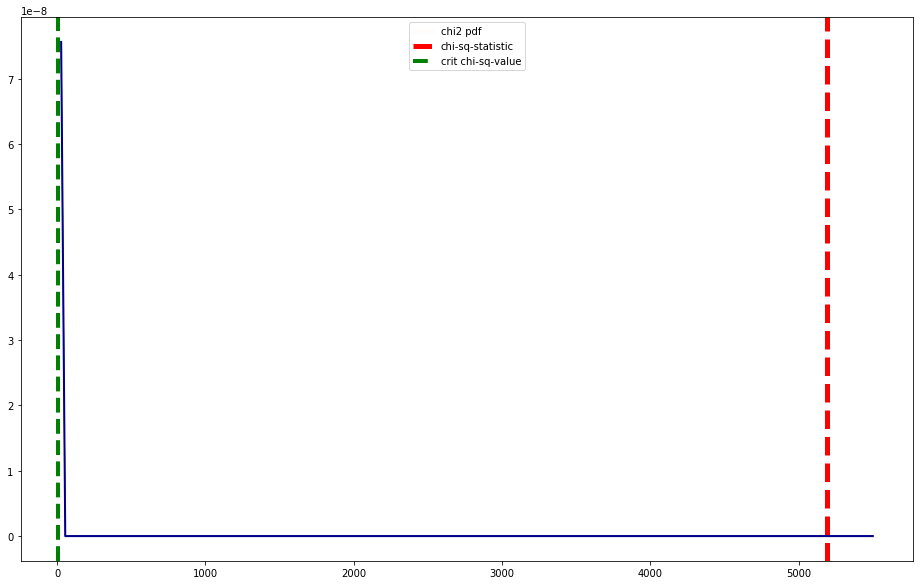

In [285]:
# Visualizing original hypothesis. Massive significance.
visualize_chisq(chi2_stat, df=1, alpha=0.01)

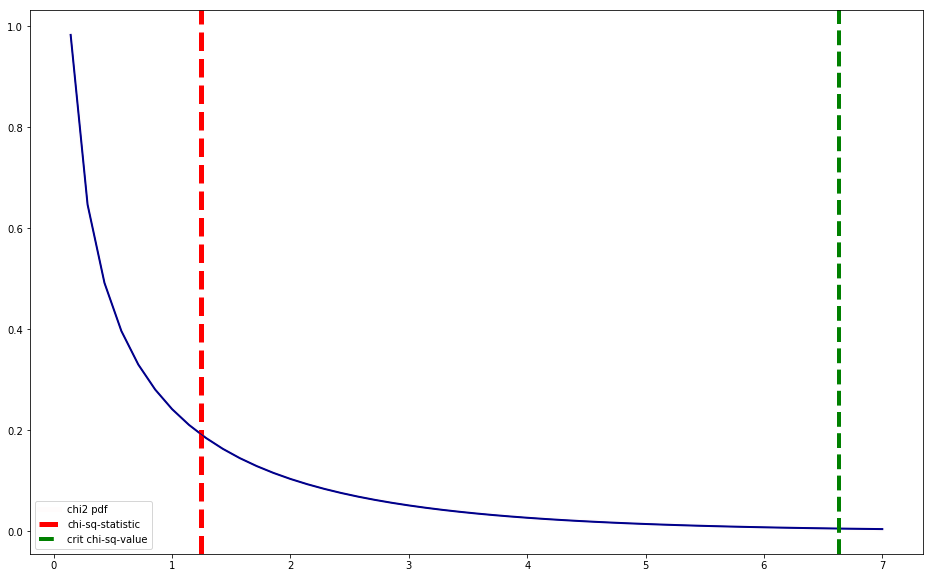

In [287]:
# Graph for software developers only. We've moved very much in the other direction. 
visualize_chisq(s_chi2_stat, df=1, alpha=0.01)